In [38]:
import os 
import sys
import importlib
sys.path.append(os.path.join(os.path.dirname('ea1'), 'src'))
import genetic_algorithm
importlib.reload(genetic_algorithm)
from genetic_algorithm import GeneticAlgorithm

import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None) 

In [3]:
def seed_everything(seed: int=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [4]:
def plot_fitness_history(fitness_history, title="Fitness over generations", label=None, figsize=(6, 4)):
    plt.figure(figsize=figsize)
    plt.plot(fitness_history, label=label or "Best fitness", color="blue")
    plt.xlabel("Generations")
    plt.ylabel("Best fitness")
    plt.title(title)
    if label:
        plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_fitness_histories(experiment_results, parameter_name="Population size",
                          title="Convergence of GA for different {parameter_name}", figsize=(6, 4)):
    plt.figure(figsize=figsize)
    colors = plt.cm.viridis(np.linspace(0, 1, len(experiment_results)))
    
    for i, (param_value, history) in enumerate(experiment_results):
        label = f"{parameter_name} {param_value} (Best: {min(history):.4f})"
        plt.plot(history, label=label, color=colors[i])

    plt.xlabel("Generations")
    plt.ylabel("Best fitness value")
    plt.title(title.format(parameter_name=parameter_name))
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## $$f(x, y, z) = x^2 + y^2 + 2z^2$$

In [6]:
def test_function(individual):
    x, y, z = individual
    return (x**2 + y**2 + 2*(z**2))

In [146]:
ga=GeneticAlgorithm(dimension=3, population_size=100, fitness_function=test_function, 
                        mutation_rate=0.1, crossover_rate=0.7, generations=10000)

In [147]:
best_solution, best_fitness, fitness_history = ga.run(eval_every=1000, early_stopping=True, patience=3000)
print("\nOptimal solution:", best_solution)
print("Objective function value:", best_fitness)
print("Theoretical minimum (for x=0, y=0, z=0):", (0**2 + 0**2 + 2*((0)**2)))

Generation 1000/10000, Best Fitness: 0.0027378387746966534, Best Individual: [-0.00036166  0.04026005  0.02363087]
Generation 2000/10000, Best Fitness: 0.0027378387746966534, Best Individual: [-0.00036166  0.04026005  0.02363087]
Generation 3000/10000, Best Fitness: 5.1397374240763585e-05, Best Individual: [-0.00036166  0.0028963   0.00463023]
Generation 4000/10000, Best Fitness: 5.1283542136215325e-05, Best Individual: [0.00013026 0.0028963  0.00463023]
Generation 5000/10000, Best Fitness: 5.128113151808995e-05, Best Individual: [0.00012066 0.0028963  0.00463023]
Generation 6000/10000, Best Fitness: 5.128113151808995e-05, Best Individual: [0.00012066 0.0028963  0.00463023]
Generation 7000/10000, Best Fitness: 5.128113151808995e-05, Best Individual: [0.00012066 0.0028963  0.00463023]
Early stopping at generation 7569 — no improvement in 3000 generations.

Optimal solution: [0.00012066 0.0028963  0.00463023]
Objective function value: 5.128113151808995e-05
Theoretical minimum (for x=0, y

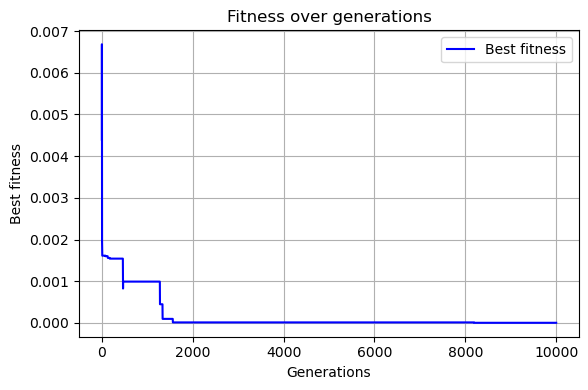

In [154]:
plot_fitness_history(fitness_history, title="Fitness over generations", label="Best fitness")

### Experiments

To ensure reproducibility, I am setting a random seed while experimenting with different parameters for the algorithm.

#### random seed 42

population size

In [58]:
population_sizes = [50, 100, 200, 500, 1000]
pop_results = []
pop_fitness_histories = []

for pop_size in population_sizes:
    seed_everything(42)
    print(f"Running GA with population size: {pop_size}")
    ga = GeneticAlgorithm(dimension=3, population_size=pop_size, fitness_function=test_function, 
                          mutation_rate=0.1, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    
    pop_results.append((pop_size, best_fitness, best_solution))
    pop_fitness_histories.append((pop_size, fitness_history))

Running GA with population size: 50
Generation 10000/10000, Best Fitness: 0.0007896556727387932, Best Individual: [ 0.00012674 -0.01358992 -0.01739186]
Running GA with population size: 100
Generation 10000/10000, Best Fitness: 0.0003438460514719925, Best Individual: [-8.74747071e-05 -1.81706015e-02  2.61415764e-03]
Running GA with population size: 200
Generation 10000/10000, Best Fitness: 5.087365237042486e-05, Best Individual: [ 1.87336722e-05 -6.92115539e-03 -1.21879232e-03]
Running GA with population size: 500
Generation 10000/10000, Best Fitness: 1.1351769653186386e-05, Best Individual: [-4.98634914e-05 -3.21772599e-03 -7.05522060e-04]
Running GA with population size: 1000
Generation 10000/10000, Best Fitness: 4.427602388867184e-06, Best Individual: [ 1.09937760e-05 -7.27012803e-05 -1.48697613e-03]


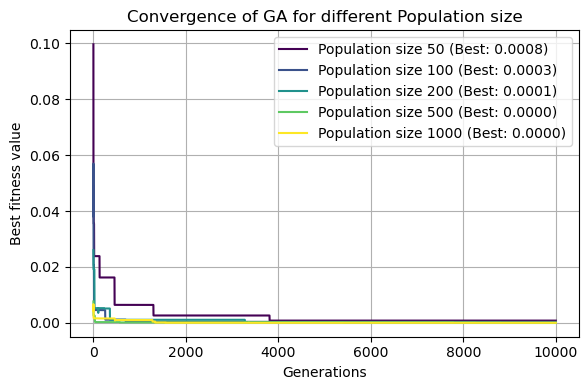

In [59]:
plot_fitness_histories(pop_fitness_histories, parameter_name="Population size")

In [60]:
df_stats = pd.DataFrame({
    'Population Size': population_sizes,
    'Best Fitness': [result[1] for result in pop_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in pop_fitness_histories]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in pop_fitness_histories]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in pop_fitness_histories]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in pop_fitness_histories]

print("\nFull Stats for population sizes:")
print(df_stats)


Full Stats for population sizes:
   Population Size  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0               50      0.000790     0.000790     0.099689      0.002555     0.004161
1              100      0.000344     0.000344     0.057000      0.000513     0.001194
2              200      0.000051     0.000051     0.025992      0.000644     0.001302
3              500      0.000011     0.000011     0.007640      0.000123     0.000165
4             1000      0.000004     0.000004     0.006682      0.000169     0.000416


mutation rate

In [61]:
mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]
mutation_results = []
mutation_history = []
for mutation_rate in mutation_rates:
    seed_everything(42)
    print(f"Running GA with mutation rate: {mutation_rate}")
    ga = GeneticAlgorithm(dimension=3, population_size=100, fitness_function=test_function, 
                               mutation_rate=mutation_rate, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    mutation_results.append((mutation_rate, best_fitness, best_solution))
    mutation_history.append((mutation_rate, fitness_history))

Running GA with mutation rate: 0.01
Generation 10000/10000, Best Fitness: 0.0032419690176351532, Best Individual: [-0.00171674  0.01212026 -0.03931998]
Running GA with mutation rate: 0.05
Generation 10000/10000, Best Fitness: 0.0005173489393553987, Best Individual: [-0.0004409  -0.015362    0.01185672]
Running GA with mutation rate: 0.1
Generation 10000/10000, Best Fitness: 0.0003438460514719925, Best Individual: [-8.74747071e-05 -1.81706015e-02  2.61415764e-03]
Running GA with mutation rate: 0.2
Generation 10000/10000, Best Fitness: 9.783881501687768e-05, Best Individual: [ 7.40579300e-06 -2.39098488e-03  6.78682369e-03]
Running GA with mutation rate: 0.5
Generation 10000/10000, Best Fitness: 0.00012397423401138715, Best Individual: [-0.00618882  0.00884623 -0.00192575]
Running GA with mutation rate: 0.7
Generation 10000/10000, Best Fitness: 0.0008977441732968233, Best Individual: [0.01667504 0.00110975 0.01758487]


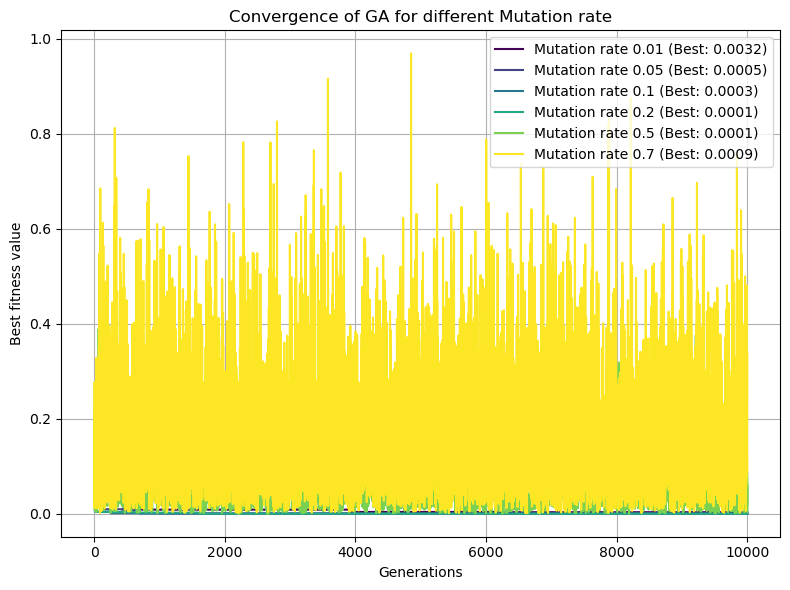

In [62]:
plot_fitness_histories(mutation_history, parameter_name="Mutation rate", figsize=(8, 6))

In [63]:
df_stats = pd.DataFrame({
    'Mutation rates': mutation_rates,
    'Best Fitness': [result[1] for result in mutation_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in mutation_history]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in mutation_history]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in mutation_history]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in mutation_history]

print("\nFull Stats for mutation rates:")
print(df_stats)


Full Stats for mutation rates:
   Mutation rates  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0            0.01      0.003242     0.003242     0.039205      0.006813     0.007129
1            0.05      0.000517     0.000517     0.052335      0.001365     0.003022
2            0.10      0.000344     0.000344     0.057000      0.000513     0.001194
3            0.20      0.000098     0.000098     0.046317      0.000622     0.002069
4            0.50      0.000124     0.000124     0.389431      0.052431     0.044781
5            0.70      0.000898     0.000898     0.968837      0.161901     0.122144


crossover rate

In [64]:
crossover_rates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
crossover_results = []
crossover_histories = []
for crossover_rate in crossover_rates:
    seed_everything(42)
    print(f"Running GA with crossover rate: {crossover_rate}")
    ga = GeneticAlgorithm(dimension=3, population_size=100, fitness_function=test_function, 
                               mutation_rate=0.1, crossover_rate=crossover_rate, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    crossover_results.append((crossover_rate, best_fitness, best_solution))
    crossover_histories.append((crossover_rate, fitness_history))

Running GA with crossover rate: 0.0
Generation 10000/10000, Best Fitness: 0.00021137578385876726, Best Individual: [-0.00830662 -0.01076561 -0.00363851]
Running GA with crossover rate: 0.1
Generation 10000/10000, Best Fitness: 3.103476694766692e-05, Best Individual: [2.33431851e-05 7.90963003e-04 3.89926913e-03]
Running GA with crossover rate: 0.3
Generation 10000/10000, Best Fitness: 1.5925338565372624e-05, Best Individual: [ 5.85243862e-05 -3.98895715e-03  7.11839352e-05]
Running GA with crossover rate: 0.5
Generation 10000/10000, Best Fitness: 4.9758831170035854e-05, Best Individual: [2.14164453e-05 4.66926333e-03 3.73873992e-03]
Running GA with crossover rate: 0.7
Generation 10000/10000, Best Fitness: 0.0003438460514719925, Best Individual: [-8.74747071e-05 -1.81706015e-02  2.61415764e-03]
Running GA with crossover rate: 0.9
Generation 10000/10000, Best Fitness: 0.00018650548821132028, Best Individual: [-2.75362871e-05  1.35207976e-02 -1.35881594e-03]
Running GA with crossover rate

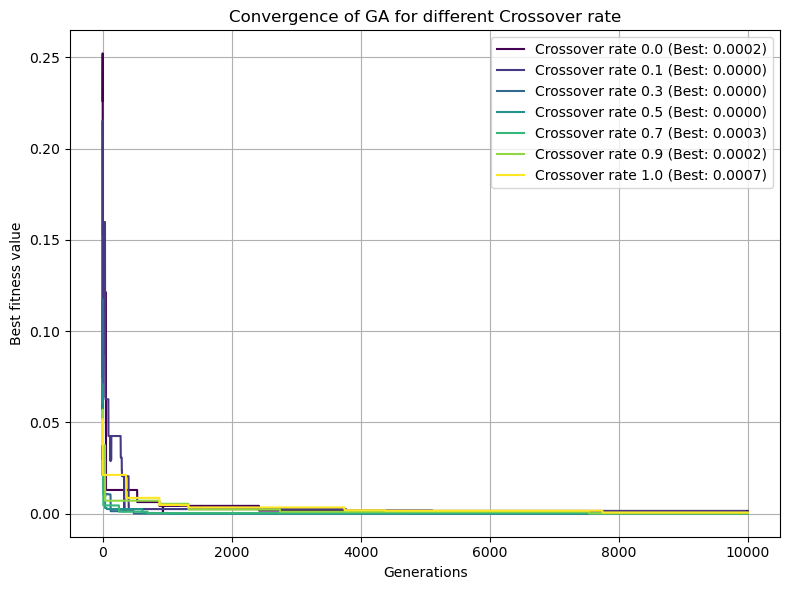

In [67]:
plot_fitness_histories(crossover_histories, parameter_name="Crossover rate", figsize=(8, 6))

In [68]:
df_stats = pd.DataFrame({
    'Crossover rates': crossover_rates,
    'Best Fitness': [result[1] for result in crossover_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in crossover_histories]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in crossover_histories]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in crossover_histories]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in crossover_histories]

print("\nFull Stats for crossover rates:")
print(df_stats)


Full Stats for crossover rates:
   Crossover rates  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0              0.0      0.000211     0.000211     0.252134      0.003389     0.009966
1              0.1      0.000031     0.000031     0.215388      0.003817     0.011999
2              0.3      0.000016     0.000016     0.117388      0.000270     0.002005
3              0.5      0.000050     0.000050     0.070974      0.000292     0.001634
4              0.7      0.000344     0.000344     0.057000      0.000513     0.001194
5              0.9      0.000187     0.000187     0.057000      0.001900     0.003015
6              1.0      0.000691     0.000691     0.051845      0.003114     0.004032


#### random seed 1234

population size

In [69]:
population_sizes = [50, 100, 200, 500, 1000]
pop_results = []
pop_fitness_histories = []

for pop_size in population_sizes:
    seed_everything(1234)
    print(f"Running GA with population size: {pop_size}")
    ga = GeneticAlgorithm(dimension=3, population_size=pop_size, fitness_function=test_function, 
                          mutation_rate=0.1, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    
    pop_results.append((pop_size, best_fitness, best_solution))
    pop_fitness_histories.append((pop_size, fitness_history))

Running GA with population size: 50
Generation 10000/10000, Best Fitness: 2.7378698496933587e-05, Best Individual: [ 0.0001905  -0.00153008 -0.00353562]
Running GA with population size: 100
Generation 10000/10000, Best Fitness: 0.0002741986242511848, Best Individual: [-0.00015274  0.0047405   0.01121835]
Running GA with population size: 200
Generation 10000/10000, Best Fitness: 0.00010661530972711549, Best Individual: [ 2.39978849e-05 -6.61156796e-03 -5.60811479e-03]
Running GA with population size: 500
Generation 10000/10000, Best Fitness: 3.725287712232972e-05, Best Individual: [6.93767255e-05 3.16587343e-03 3.68953313e-03]
Running GA with population size: 1000
Generation 10000/10000, Best Fitness: 8.835752877264251e-05, Best Individual: [-1.15611893e-05 -8.07173739e-03 -3.40620394e-03]


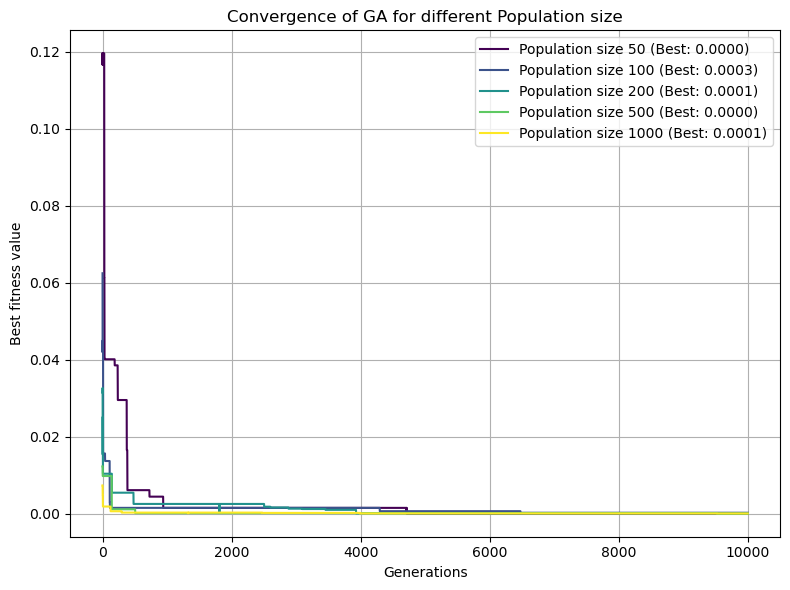

In [70]:
plot_fitness_histories(pop_fitness_histories, parameter_name="Population size", figsize=(8, 6))

In [71]:
df_stats = pd.DataFrame({
    'Population Size': population_sizes,
    'Best Fitness': [result[1] for result in pop_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in pop_fitness_histories]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in pop_fitness_histories]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in pop_fitness_histories]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in pop_fitness_histories]

print("\nFull Stats for population sizes:")
print(df_stats)


Full Stats for population sizes:
   Population Size  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0               50      0.000027     0.000027     0.119584      0.002486     0.008998
1              100      0.000274     0.000274     0.062476      0.001077     0.001970
2              200      0.000107     0.000107     0.032695      0.001112     0.001798
3              500      0.000037     0.000037     0.012359      0.000344     0.001161
4             1000      0.000088     0.000088     0.007388      0.000195     0.000255


mutation rate

In [72]:
mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]
mutation_results = []
mutation_history = []
for mutation_rate in mutation_rates:
    seed_everything(1234)
    print(f"Running GA with mutation rate: {mutation_rate}")
    ga = GeneticAlgorithm(dimension=3, population_size=100, fitness_function=test_function, 
                               mutation_rate=mutation_rate, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    mutation_results.append((mutation_rate, best_fitness, best_solution))
    mutation_history.append((mutation_rate, fitness_history))

Running GA with mutation rate: 0.01
Generation 10000/10000, Best Fitness: 0.0014289877469520495, Best Individual: [0.00104522 0.02144979 0.02199775]
Running GA with mutation rate: 0.05
Generation 10000/10000, Best Fitness: 0.0004266075085611456, Best Individual: [-0.00048298 -0.00381704 -0.01434929]
Running GA with mutation rate: 0.1
Generation 10000/10000, Best Fitness: 0.0002741986242511848, Best Individual: [-0.00015274  0.0047405   0.01121835]
Running GA with mutation rate: 0.2
Generation 10000/10000, Best Fitness: 3.450913428547985e-05, Best Individual: [-7.96471309e-06  4.00077069e-03  3.04162002e-03]
Running GA with mutation rate: 0.5
Generation 10000/10000, Best Fitness: 0.00014357493227694948, Best Individual: [-0.00743637  0.00791477  0.00357992]
Running GA with mutation rate: 0.7
Generation 10000/10000, Best Fitness: 0.0004154835360494391, Best Individual: [ 0.00917198 -0.0122497  -0.00952111]


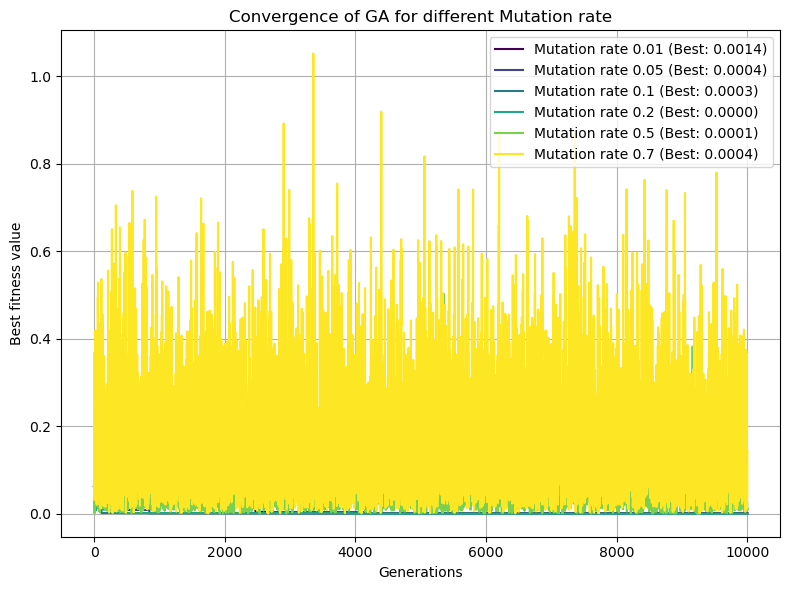

In [73]:
plot_fitness_histories(mutation_history, parameter_name="Mutation rate", figsize=(8, 6))

In [74]:
df_stats = pd.DataFrame({
    'Mutation rates': mutation_rates,
    'Best Fitness': [result[1] for result in mutation_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in mutation_history]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in mutation_history]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in mutation_history]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in mutation_history]

print("\nFull Stats for mutation rates:")
print(df_stats)


Full Stats for mutation rates:
   Mutation rates  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0            0.01      0.001429     0.001429     0.062476      0.009846     0.013982
1            0.05      0.000427     0.000427     0.062476      0.001689     0.005017
2            0.10      0.000274     0.000274     0.062476      0.001077     0.001970
3            0.20      0.000035     0.000035     0.062476      0.000956     0.003321
4            0.50      0.000144     0.000144     0.502839      0.049952     0.041269
5            0.70      0.000415     0.000415     1.052199      0.165083     0.121672


crossover rate

In [75]:
crossover_rates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
crossover_results = []
crossover_histories = []
for crossover_rate in crossover_rates:
    seed_everything(1234)
    print(f"Running GA with crossover rate: {crossover_rate}")
    ga = GeneticAlgorithm(dimension=3, population_size=100, fitness_function=test_function, 
                               mutation_rate=0.1, crossover_rate=crossover_rate, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    crossover_results.append((crossover_rate, best_fitness, best_solution))
    crossover_histories.append((crossover_rate, fitness_history))

Running GA with crossover rate: 0.0
Generation 10000/10000, Best Fitness: 0.0011289274934244014, Best Individual: [-0.01492235 -0.02982387  0.00289721]
Running GA with crossover rate: 0.1
Generation 10000/10000, Best Fitness: 0.0003066650469973651, Best Individual: [ 1.97153038e-05 -1.30298862e-02  8.27305032e-03]
Running GA with crossover rate: 0.3
Generation 10000/10000, Best Fitness: 1.8080317345543286e-05, Best Individual: [-2.07116289e-04 -4.24700518e-03 -1.35500722e-05]
Running GA with crossover rate: 0.5
Generation 10000/10000, Best Fitness: 5.271012881637287e-05, Best Individual: [-0.00024299 -0.00552208  0.00332849]
Running GA with crossover rate: 0.7
Generation 10000/10000, Best Fitness: 0.0002741986242511848, Best Individual: [-0.00015274  0.0047405   0.01121835]
Running GA with crossover rate: 0.9
Generation 10000/10000, Best Fitness: 0.001031956350413846, Best Individual: [-0.00015051 -0.03178368 -0.00329632]
Running GA with crossover rate: 1.0
Generation 10000/10000, Best

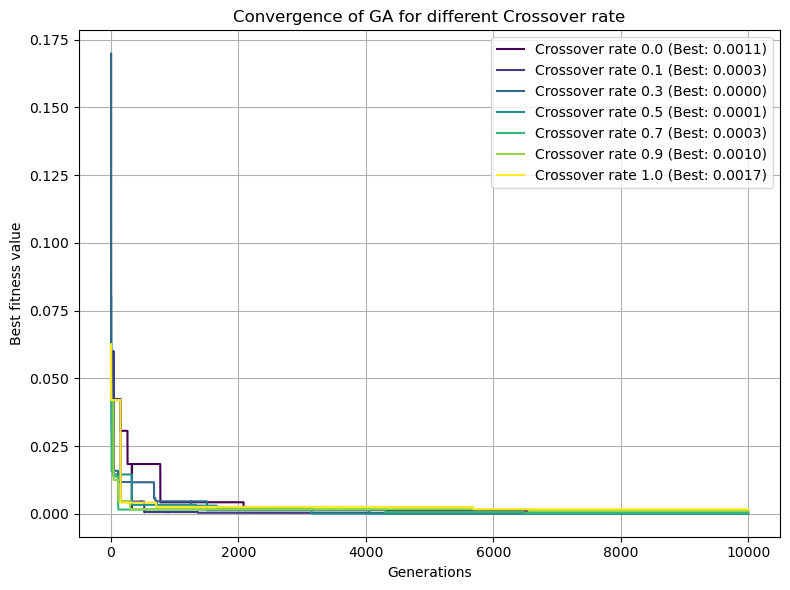

In [76]:
plot_fitness_histories(crossover_histories, parameter_name="Crossover rate", figsize=(8, 6))

In [77]:
df_stats = pd.DataFrame({
    'Crossover rates': crossover_rates,
    'Best Fitness': [result[1] for result in crossover_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in crossover_histories]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in crossover_histories]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in crossover_histories]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in crossover_histories]

print("\nFull Stats for crossover rates:")
print(df_stats)


Full Stats for crossover rates:
   Crossover rates  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0              0.0      0.001129     0.001129     0.041973      0.003437     0.006746
1              0.1      0.000307     0.000307     0.059930      0.001193     0.005758
2              0.3      0.000018     0.000018     0.169933      0.001650     0.004019
3              0.5      0.000053     0.000053     0.062476      0.001352     0.003465
4              0.7      0.000274     0.000274     0.062476      0.001077     0.001970
5              0.9      0.001032     0.001032     0.062476      0.001737     0.002773
6              1.0      0.001667     0.001667     0.062476      0.002841     0.004873


## Rastrigin function

$$
f(x_1, x_2, x_3, x_4, x_5) = 10 \cdot 5 + \sum_{i=1}^{5} \left(x_i^2 - 10 \cdot \cos(2\pi x_i)\right)
$$

where \( A = 10 \) by default.

In [14]:
def rastrigin_function(individual):
    return 10 * len(individual) + sum([(x**2 - 10 * np.cos(2 * np.pi * x)) for x in individual])

In [167]:
ga_rastigin=GeneticAlgorithm(dimension=5, population_size=100, fitness_function=rastrigin_function, 
                         mutation_rate=0.1, crossover_rate=0.7, generations=10000)

In [168]:
best_solution, best_fitness, history = ga_rastigin.run(eval_every=1000, early_stopping=True, patience=3000)

print("\nOptimal solution:", best_solution)
print("Objective function value:", best_fitness)

A, n= 10, 5
x = np.zeros(n)
theoretical_min = A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))
print("Theoretical minimum (for x1,...,x5 = 0):", theoretical_min)

Generation 1000/10000, Best Fitness: 1.4051425602091143, Best Individual: [ 0.00181723  0.03906227  0.00198084 -1.01769228 -0.00505953]
Generation 2000/10000, Best Fitness: 1.1459818561963004, Best Individual: [0.00181723 0.03906227 0.00198084 0.03976912 0.0519736 ]
Generation 3000/10000, Best Fitness: 1.1458791508073176, Best Individual: [0.00166871 0.03906227 0.00198084 0.03976912 0.0519736 ]
Generation 4000/10000, Best Fitness: 0.8785034388191377, Best Individual: [ 0.00166871 -0.0130628   0.00198084  0.03976912  0.0519736 ]
Generation 5000/10000, Best Fitness: 0.49297475396848256, Best Individual: [ 0.00143888 -0.0130628   0.00198084  0.0196377   0.04399309]
Generation 6000/10000, Best Fitness: 0.23067265777249446, Best Individual: [ 0.00143888 -0.0130628   0.00198084  0.00885754  0.03017366]
Generation 7000/10000, Best Fitness: 0.06714735785847381, Best Individual: [ 0.00143888 -0.0130628   0.00198084 -0.00952845  0.00843651]
Generation 8000/10000, Best Fitness: 0.0667628537714151

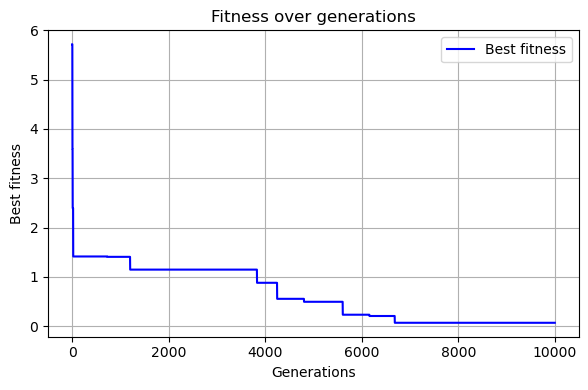

In [169]:
plot_fitness_history(history, title="Fitness over generations", label="Best fitness")

trying more generations

In [170]:
best_solution, best_fitness, fitness_history = ga_rastigin.run(eval_every=1000, early_stopping=True, patience=3000)

Generation 1000/10000, Best Fitness: 0.0667371838852091, Best Individual: [-5.36770378e-05 -1.30627979e-02  1.98084370e-03 -9.52844647e-03
  8.43650652e-03]
Generation 2000/10000, Best Fitness: 0.0667371838852091, Best Individual: [-5.36770378e-05 -1.30627979e-02  1.98084370e-03 -9.52844647e-03
  8.43650652e-03]
Generation 3000/10000, Best Fitness: 0.0667371838852091, Best Individual: [-5.36770378e-05 -1.30627979e-02  1.98084370e-03 -9.52844647e-03
  8.43650652e-03]
Early stopping at generation 3001 — no improvement in 3000 generations.


### Experiments

#### random seed 42

population size

In [53]:
population_sizes = [50, 100, 200, 500, 1000]
pop_results = []
pop_history_r=[]
for pop_size in population_sizes:
    seed_everything(42)
    print(f"Running GA with population size: {pop_size}")
    ga = GeneticAlgorithm(dimension=5, population_size=pop_size, fitness_function=rastrigin_function, 
                               mutation_rate=0.1, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    pop_results.append((pop_size, best_fitness, best_solution))
    pop_history_r.append((pop_size, fitness_history))

Running GA with population size: 50
Generation 10000/10000, Best Fitness: 0.35220082596435986, Best Individual: [-0.00047362 -0.001139   -0.0111042  -0.03714385  0.01665253]
Running GA with population size: 100
Generation 10000/10000, Best Fitness: 0.21565557622282228, Best Individual: [ 0.00053376 -0.00610267  0.00612128  0.02777378  0.01558154]
Running GA with population size: 200
Generation 10000/10000, Best Fitness: 0.08548368645244153, Best Individual: [ 0.00014704  0.01135364 -0.00311862 -0.01617498  0.00555713]
Running GA with population size: 500
Generation 10000/10000, Best Fitness: 0.031100271433899707, Best Individual: [-2.75275128e-05  3.72309284e-03  5.52211712e-03 -6.30523544e-03
 -8.52501233e-03]
Running GA with population size: 1000
Generation 10000/10000, Best Fitness: 0.008495715146665361, Best Individual: [-5.15938687e-06 -1.70468188e-03 -4.36209642e-03 -4.55883851e-03
 -3.29573293e-04]


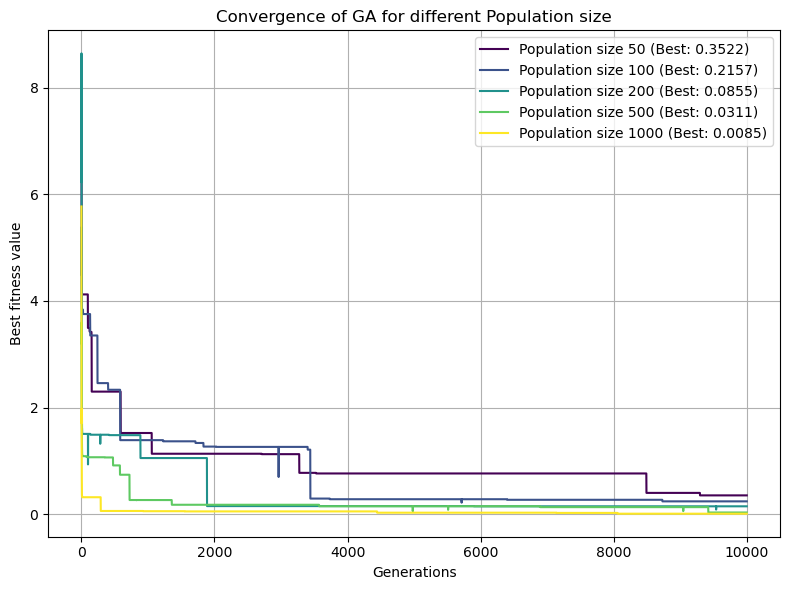

In [54]:
plot_fitness_histories(pop_history_r, parameter_name="Population size", figsize=(8, 6))

In [55]:
df_stats = pd.DataFrame({
    'Population Size': population_sizes,
    'Best Fitness': [result[1] for result in pop_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in pop_history_r]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in pop_history_r]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in pop_history_r]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in pop_history_r]

print("\nFull Stats for population sizes:")
print(df_stats)


Full Stats for population sizes:
   Population Size  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0               50      0.352201     0.352201     7.712450      0.938096     0.558345
1              100      0.215656     0.215656     5.383683      0.719327     0.728742
2              200      0.085484     0.085484     8.642792      0.360438     0.460645
3              500      0.031100     0.031100     3.599180      0.212372     0.232543
4             1000      0.008496     0.008496     5.770975      0.043955     0.087711


mutation rates

In [50]:
mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]
mutation_results = []
mutation_history_r=[]
for mutation_rate in mutation_rates:
    seed_everything(42)
    print(f"Running GA with mutation rate: {mutation_rate}")
    ga = GeneticAlgorithm(dimension=5, population_size=100, fitness_function=rastrigin_function, 
                               mutation_rate=mutation_rate, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    mutation_results.append((mutation_rate, best_fitness, best_solution))
    mutation_history_r.append((mutation_rate, fitness_history))

Running GA with mutation rate: 0.01
Generation 10000/10000, Best Fitness: 2.0105875741078165, Best Individual: [-7.64305865e-05  1.82218257e-02  1.08376515e-02  6.43044854e-02
  9.70602788e-01]
Running GA with mutation rate: 0.05
Generation 10000/10000, Best Fitness: 0.5174033169793617, Best Individual: [ 5.78314000e-05  1.13536448e-02  1.08376515e-02 -1.89238032e-02
 -4.49145259e-02]
Running GA with mutation rate: 0.1
Generation 10000/10000, Best Fitness: 0.21565557622282228, Best Individual: [ 0.00053376 -0.00610267  0.00612128  0.02777378  0.01558154]
Running GA with mutation rate: 0.2
Generation 10000/10000, Best Fitness: 0.015807513233070836, Best Individual: [ 0.00024334  0.00035647  0.00269975  0.00310596 -0.00791009]
Running GA with mutation rate: 0.5
Generation 10000/10000, Best Fitness: 0.30095738791837334, Best Individual: [ 0.00117066 -0.00589159 -0.01017419  0.0205114  -0.03098875]
Running GA with mutation rate: 0.7
Generation 10000/10000, Best Fitness: 2.0471498713228584,

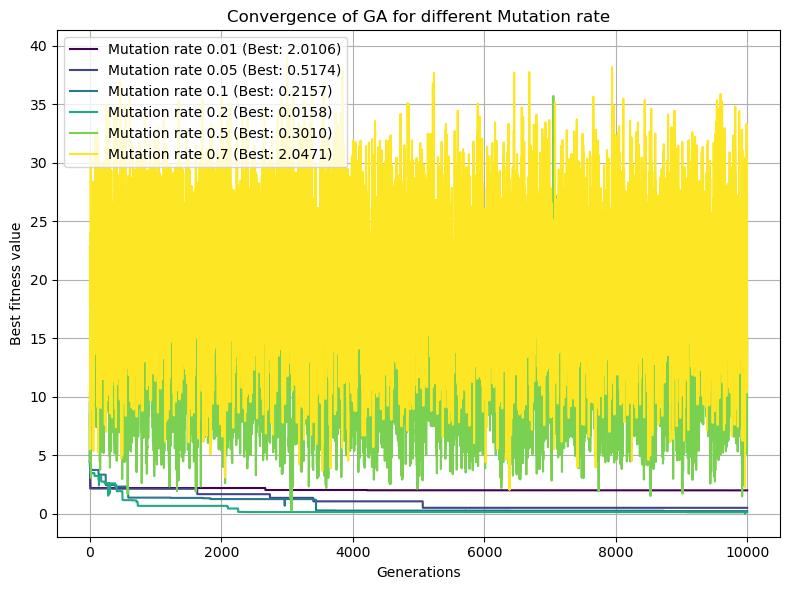

In [51]:
plot_fitness_histories(mutation_history_r, parameter_name="Mutation rate", figsize=(8, 6))

In [52]:
df_stats = pd.DataFrame({
    'Mutation rates': mutation_rates,
    'Best Fitness': [result[1] for result in mutation_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in mutation_history_r]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in mutation_history_r]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in mutation_history_r]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in mutation_history_r]

print("\nFull Stats for mutation rates:")
print(df_stats)


Full Stats for mutation rates:
   Mutation rates  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0            0.01      2.010588     2.010588     4.489877      2.071823     0.095267
1            0.05      0.517403     0.517403     9.520749      1.064345     0.631107
2            0.10      0.215656     0.215656     5.383683      0.719327     0.728742
3            0.20      0.015808     0.015808     8.674076      0.381362     0.605919
4            0.50      0.300957     0.300957    35.695390     10.550406     3.904266
5            0.70      2.047150     2.047150    39.331161     20.142673     5.618629


crossover rates

In [47]:
crossover_rates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
crossover_results = []
crossover_histories_r=[]
for crossover_rate in crossover_rates:
    seed_everything(42)
    print(f"Running GA with crossover rate: {crossover_rate}")
    ga = GeneticAlgorithm(dimension=5, population_size=100, fitness_function=rastrigin_function, 
                               mutation_rate=0.1, crossover_rate=crossover_rate, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    crossover_results.append((crossover_rate, best_fitness, best_solution))
    crossover_histories_r.append((crossover_rate, fitness_history))

Running GA with crossover rate: 0.0
Generation 10000/10000, Best Fitness: 2.84380692675969, Best Individual: [-0.0101605  -0.90835447 -0.02733583  0.0194917   0.02865704]
Running GA with crossover rate: 0.1
Generation 10000/10000, Best Fitness: 1.3300797692364839, Best Individual: [ 0.00311583  0.02102224 -0.05178543 -0.01875979 -0.05725844]
Running GA with crossover rate: 0.3
Generation 10000/10000, Best Fitness: 0.04417254932053538, Best Individual: [0.00266734 0.00352447 0.00172624 0.01412259 0.00090542]
Running GA with crossover rate: 0.5
Generation 10000/10000, Best Fitness: 0.10187098391629945, Best Individual: [-0.00065762  0.00395546  0.01083765  0.01917681 -0.00356218]
Running GA with crossover rate: 0.7
Generation 10000/10000, Best Fitness: 0.21565557622282228, Best Individual: [ 0.00053376 -0.00610267  0.00612128  0.02777378  0.01558154]
Running GA with crossover rate: 0.9
Generation 10000/10000, Best Fitness: 0.4236982086359191, Best Individual: [-0.00147219 -0.01134947  0.

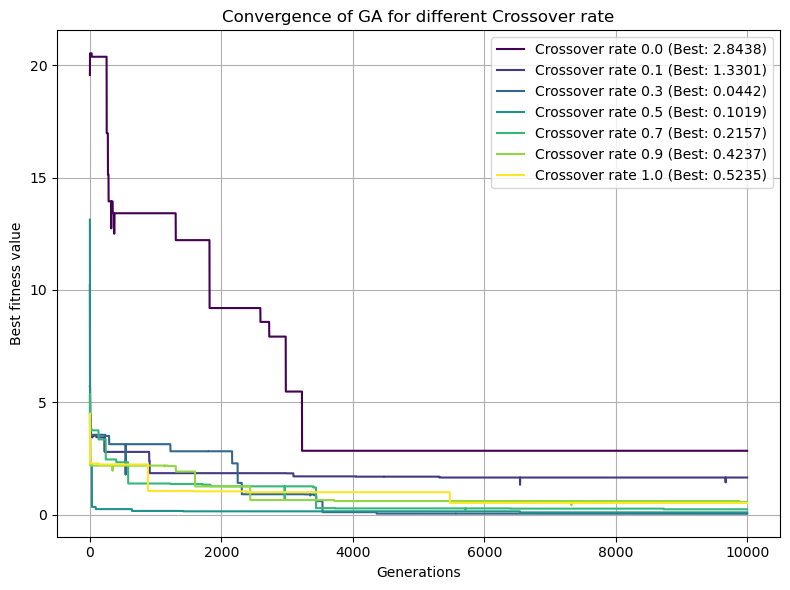

In [48]:
plot_fitness_histories(crossover_histories_r, parameter_name="Crossover rate", figsize=(8, 6))

In [49]:
df_stats = pd.DataFrame({
    'Crossover rates': crossover_rates,
    'Best Fitness': [result[1] for result in crossover_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in crossover_histories_r]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in crossover_histories_r]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in crossover_histories_r]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in crossover_histories_r]

print("\nFull Stats for crossover rates:")
print(df_stats)


Full Stats for crossover rates:
   Crossover rates  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0              0.0      2.843807     2.843807    20.524471      5.656300     4.565337
1              0.1      1.330080     1.330080     5.716408      1.825905     0.386773
2              0.3      0.044173     0.044173    10.220910      0.835090     1.227222
3              0.5      0.101871     0.101871    13.125960      0.149635     0.204481
4              0.7      0.215656     0.215656     5.383683      0.719327     0.728742
5              0.9      0.423698     0.423698     4.489877      0.911948     0.565135
6              1.0      0.523475     0.523475     4.489877      0.902694     0.480841


#### random seed 1234

population size

In [41]:
population_sizes = [50, 100, 200, 500, 1000]
pop_results = []
pop_history_r=[]
for pop_size in population_sizes:
    seed_everything(1234)
    print(f"Running GA with population size: {pop_size}")
    ga = GeneticAlgorithm(dimension=5, population_size=pop_size, fitness_function=rastrigin_function, 
                               mutation_rate=0.1, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    pop_results.append((pop_size, best_fitness, best_solution))
    pop_history_r.append((pop_size, fitness_history))

Running GA with population size: 50
Generation 10000/10000, Best Fitness: 0.5858227914516618, Best Individual: [ 0.0004825  -0.00457259  0.04735528  0.00756378 -0.02549087]
Running GA with population size: 100
Generation 10000/10000, Best Fitness: 0.05209491462495919, Best Individual: [ 0.0001235  -0.00221859  0.01063475 -0.00670883 -0.00998113]
Running GA with population size: 200
Generation 10000/10000, Best Fitness: 0.09426789082838383, Best Individual: [ 0.00019007 -0.00407704  0.01643906  0.00912073 -0.01026497]
Running GA with population size: 500
Generation 10000/10000, Best Fitness: 0.002143359789457122, Best Individual: [-4.58211119e-05  2.17694993e-03 -2.38865867e-03 -5.70940297e-04
 -1.75961381e-04]
Running GA with population size: 1000
Generation 10000/10000, Best Fitness: 0.0014047225058035906, Best Individual: [-4.27703595e-05 -1.82671241e-03  4.25095971e-04 -9.15985084e-04
  1.64989613e-03]


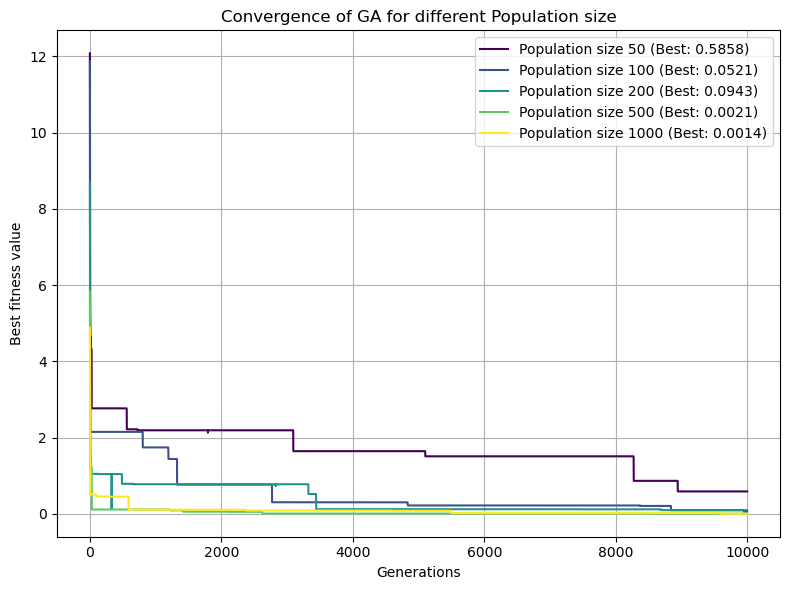

In [42]:
plot_fitness_histories(pop_history_r, parameter_name="Population size", figsize=(8, 6))

In [44]:
df_stats = pd.DataFrame({
    'Population Size': population_sizes,
    'Best Fitness': [result[1] for result in pop_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in pop_history_r]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in pop_history_r]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in pop_history_r]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in pop_history_r]

print("\nFull Stats for population sizes:")
print(df_stats)


Full Stats for population sizes:
   Population Size  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0               50      0.585823     0.585823    12.081272      1.644196     0.591404
1              100      0.052095     0.052095    11.865677      0.533168     0.626430
2              200      0.094268     0.094268     8.672222      0.353592     0.351532
3              500      0.002143     0.002143     5.833781      0.030489     0.131199
4             1000      0.001405     0.001405     4.885997      0.080738     0.131347


mutation rate

In [31]:
mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]
mutation_results = []
mutation_history_r=[]
for mutation_rate in mutation_rates:
    seed_everything(1234)
    print(f"Running GA with mutation rate: {mutation_rate}")
    ga = GeneticAlgorithm(dimension=5, population_size=100, fitness_function=rastrigin_function, 
                               mutation_rate=mutation_rate, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    mutation_results.append((mutation_rate, best_fitness, best_solution))
    mutation_history_r.append((mutation_rate, fitness_history))

Running GA with mutation rate: 0.01
Generation 10000/10000, Best Fitness: 1.2131097385919603, Best Individual: [-0.00931109 -0.00425409  0.02736978  1.00034026  0.01479045]
Running GA with mutation rate: 0.05
Generation 10000/10000, Best Fitness: 0.4455326499895804, Best Individual: [0.00104981 0.00791707 0.02736978 0.02007694 0.03218125]
Running GA with mutation rate: 0.1
Generation 10000/10000, Best Fitness: 0.05209491462495919, Best Individual: [ 0.0001235  -0.00221859  0.01063475 -0.00670883 -0.00998113]
Running GA with mutation rate: 0.2
Generation 10000/10000, Best Fitness: 0.016621839204546518, Best Individual: [ 4.44385282e-05 -1.23877732e-03  1.58877992e-03 -6.65558181e-03
 -5.95279756e-03]
Running GA with mutation rate: 0.5
Generation 10000/10000, Best Fitness: 0.8965185048982036, Best Individual: [ 0.03493476  0.00415568  0.05142719 -0.00642435  0.02498304]
Running GA with mutation rate: 0.7
Generation 10000/10000, Best Fitness: 2.4041494694621193, Best Individual: [0.020949

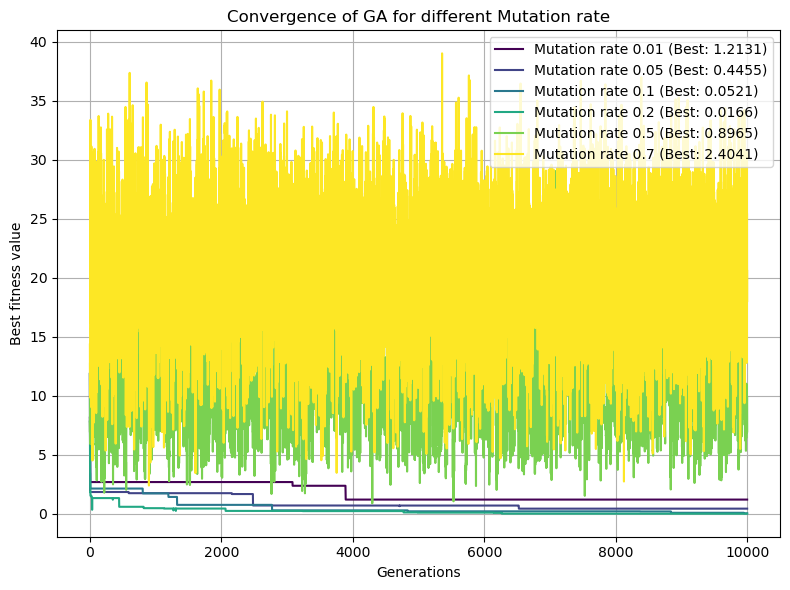

In [32]:
plot_fitness_histories(mutation_history_r, parameter_name="Mutation rate", figsize=(8, 6))

In [ ]:
df_stats = pd.DataFrame({
    'Mutation rates rates': mutation_rates,
    'Best Fitness': [result[1] for result in mutation_results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in mutation_history_r]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in mutation_history_r]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in mutation_history_r]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in mutation_history_r]

print("\nFull Stats for mutation rates:")
print(df_stats)


Full Stats for mutation rates:
   Crossover rates  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0             0.01      1.213110     1.213110     8.152551      1.767463     0.705135
1             0.05      0.445533     0.445533    11.865677      0.882385     0.538314
2             0.10      0.052095     0.052095    11.865677      0.533168     0.626430
3             0.20      0.016622     0.016622     7.855226      0.232016     0.318103
4             0.50      0.896519     0.896519    29.064728     10.938241     3.959766
5             0.70      2.404149     2.404149    39.030751     20.113530     5.595037


crossover rate

In [19]:
crossover_rates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
results = []
crossover_histories_r=[]
for crossover_rate in crossover_rates:
    seed_everything(1234)
    print(f"Running GA with crossover rate: {crossover_rate}")
    ga = GeneticAlgorithm(dimension=5, population_size=100, fitness_function=rastrigin_function, 
                               mutation_rate=0.1, crossover_rate=crossover_rate, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    results.append((crossover_rate, best_fitness, best_solution))
    crossover_histories_r.append((crossover_rate, fitness_history))

Running GA with crossover rate: 0.0
Generation 10000/10000, Best Fitness: 3.8859664681597508, Best Individual: [-0.96473525 -0.94861367 -0.01520546  0.95919912  0.00274465]
Running GA with crossover rate: 0.1
Generation 10000/10000, Best Fitness: 0.9414926241501149, Best Individual: [ 0.00024807  0.04194967  0.0389488  -0.03442461 -0.01749983]
Running GA with crossover rate: 0.3
Generation 10000/10000, Best Fitness: 0.03305683769919199, Best Individual: [ 0.00027623  0.00064881 -0.01131959  0.003802    0.0048574 ]
Running GA with crossover rate: 0.5
Generation 10000/10000, Best Fitness: 0.05570508128948859, Best Individual: [-0.00023897  0.01174128  0.00167342  0.00817352 -0.00856479]
Running GA with crossover rate: 0.7
Generation 10000/10000, Best Fitness: 0.05209491462495919, Best Individual: [ 0.0001235  -0.00221859  0.01063475 -0.00670883 -0.00998113]
Running GA with crossover rate: 0.9
Generation 10000/10000, Best Fitness: 0.25587570845185326, Best Individual: [ 0.00078339 -0.0054

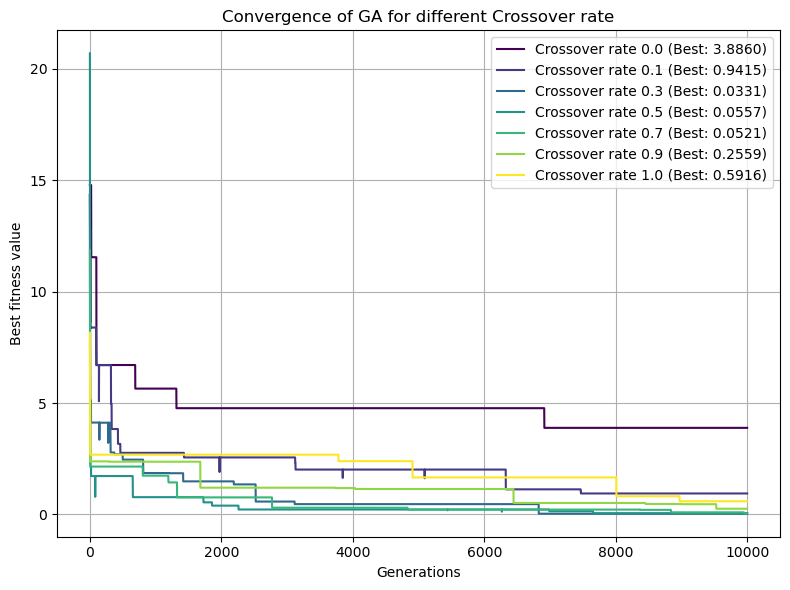

In [20]:
plot_fitness_histories(crossover_histories_r, parameter_name="Crossover rate", figsize=(8, 6))

In [40]:
df_stats = pd.DataFrame({
    'Crossover rates': crossover_rates,
    'Best Fitness': [result[1] for result in results]
})

df_stats['Min Fitness'] = [np.min(fitness_history) for _, fitness_history in crossover_histories_r]
df_stats['Max Fitness'] = [np.max(fitness_history) for _, fitness_history in crossover_histories_r]
df_stats['Mean Fitness'] = [np.mean(fitness_history) for _, fitness_history in crossover_histories_r]
df_stats['Std Fitness'] = [np.std(fitness_history) for _, fitness_history in crossover_histories_r]

print("\nFull Stats for crossover rates:")
print(df_stats)


Full Stats for crossover rates:
   Crossover rates  Best Fitness  Min Fitness  Max Fitness  Mean Fitness  Std Fitness
0              0.0      3.885966     3.885966    14.782729      4.739204     1.035948
1              0.1      0.941493     0.941493    14.339735      2.000261     1.211995
2              0.3      0.033057     0.033057    14.339735      0.748103     0.938127
3              0.5      0.055705     0.055705    20.694151      0.350622     0.484929
4              0.7      0.052095     0.052095    11.865677      0.533168     0.626430
5              0.9      0.255876     0.255876     7.855226      1.122276     0.654171
6              1.0      0.591584     0.591584     8.152551      1.939819     0.757023


algorithm with best parameters from experiments

In [45]:
best_algorithm = GeneticAlgorithm(dimension=5, population_size=1000, fitness_function=rastrigin_function,
                                   mutation_rate=0.2, crossover_rate=0.3, generations=10000)
best_solution, best_fitness, fitness_history = best_algorithm.run(eval_every=1000, early_stopping=False)

Generation 1000/10000, Best Fitness: 0.023235802254355065, Best Individual: [ 2.32342001e-04 -3.19008761e-05  7.27891444e-04  1.07681789e-02
  7.91272859e-04]
Generation 2000/10000, Best Fitness: 0.005933535780201282, Best Individual: [ 0.00014669 -0.00231522  0.00072789  0.00380299 -0.00308787]
Generation 3000/10000, Best Fitness: 0.005933535780201282, Best Individual: [ 0.00014669 -0.00231522  0.00072789  0.00380299 -0.00308787]
Generation 4000/10000, Best Fitness: 0.005933535780201282, Best Individual: [ 0.00014669 -0.00231522  0.00072789  0.00380299 -0.00308787]
Generation 5000/10000, Best Fitness: 0.005933535780201282, Best Individual: [ 0.00014669 -0.00231522  0.00072789  0.00380299 -0.00308787]
Generation 6000/10000, Best Fitness: 0.005933535780201282, Best Individual: [ 0.00014669 -0.00231522  0.00072789  0.00380299 -0.00308787]
Generation 7000/10000, Best Fitness: 0.000236466443546135, Best Individual: [ 5.51205615e-05  8.28054028e-04  7.43033171e-05 -4.31804293e-04
  5.578789